In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: VZ
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


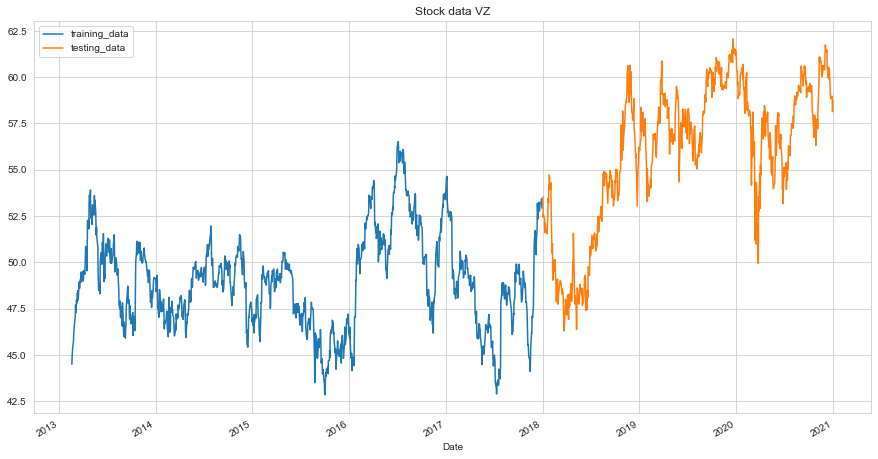

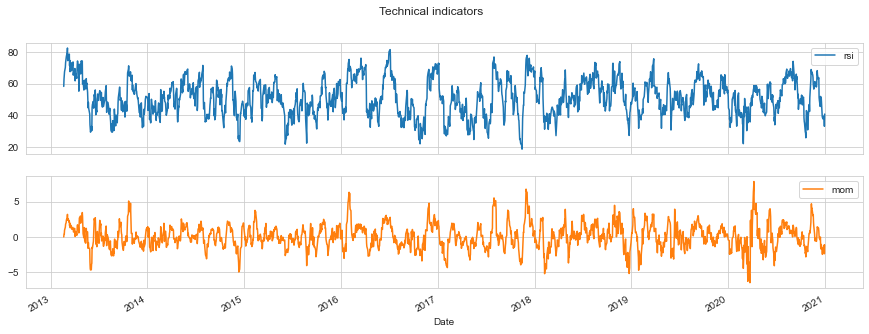

In [2]:
stock_name = 'vz'.upper()
industry = 'Communication Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1129.63, duration: 0:00:00.208046
episode: 2/2000, episode end value: 1102.58, duration: 0:00:00.197013
episode: 3/2000, episode end value: 1140.16, duration: 0:00:00.210049
episode: 4/2000, episode end value: 1101.68, duration: 0:00:00.212044
episode: 5/2000, episode end value: 1133.60, duration: 0:00:00.210046
episode: 6/2000, episode end value: 1149.25, duration: 0:00:00.206047
episode: 7/2000, episode end value: 1137.44, duration: 0:00:00.191048
episode: 8/2000, episode end value: 1096.36, duration: 0:00:00.187055
episode: 9/2000, episode end value: 1112.74, duration: 0:00:00.186583
episode: 10/2000, episode end value: 1095.51, duration: 0:00:00.178119
episode: 11/2000, episode end value: 1112.59, duration: 0:00:00.209103
episode: 12/2000, episode end value: 1131.06, duration: 0:00:00.204537
episode: 13/2000, episode end value: 1105.39, duration: 0:00:00.195152
episode: 14/2000, episode end value: 1113.75, duration: 0:00:00.212149
episode: 15/200

episode: 117/2000, episode end value: 1147.72, duration: 0:00:00.167033
episode: 118/2000, episode end value: 1096.67, duration: 0:00:00.186055
episode: 119/2000, episode end value: 1106.72, duration: 0:00:00.199039
episode: 120/2000, episode end value: 1108.00, duration: 0:00:00.196030
episode: 121/2000, episode end value: 1088.66, duration: 0:00:00.193055
episode: 122/2000, episode end value: 1101.03, duration: 0:00:00.208159
episode: 123/2000, episode end value: 1164.04, duration: 0:00:00.216916
episode: 124/2000, episode end value: 1091.38, duration: 0:00:00.197027
episode: 125/2000, episode end value: 1119.42, duration: 0:00:00.193074
episode: 126/2000, episode end value: 1094.43, duration: 0:00:00.205037
episode: 127/2000, episode end value: 1103.65, duration: 0:00:00.207057
episode: 128/2000, episode end value: 1103.05, duration: 0:00:00.210047
episode: 129/2000, episode end value: 1134.46, duration: 0:00:00.210062
episode: 130/2000, episode end value: 1126.65, duration: 0:00:00

episode: 232/2000, episode end value: 1114.32, duration: 0:00:00.212241
episode: 233/2000, episode end value: 1111.70, duration: 0:00:00.209674
episode: 234/2000, episode end value: 1113.15, duration: 0:00:00.205052
episode: 235/2000, episode end value: 1118.35, duration: 0:00:00.207055
episode: 236/2000, episode end value: 1118.73, duration: 0:00:00.200038
episode: 237/2000, episode end value: 1098.23, duration: 0:00:00.196062
episode: 238/2000, episode end value: 1096.47, duration: 0:00:00.194031
episode: 239/2000, episode end value: 1105.33, duration: 0:00:00.211053
episode: 240/2000, episode end value: 1101.20, duration: 0:00:00.200058
episode: 241/2000, episode end value: 1096.93, duration: 0:00:00.201052
episode: 242/2000, episode end value: 1102.09, duration: 0:00:00.208092
episode: 243/2000, episode end value: 1101.14, duration: 0:00:00.203999
episode: 244/2000, episode end value: 1101.81, duration: 0:00:00.220009
episode: 245/2000, episode end value: 1109.75, duration: 0:00:00

episode: 346/2000, episode end value: 1093.91, duration: 0:00:00.212045
episode: 347/2000, episode end value: 1091.69, duration: 0:00:00.210033
episode: 348/2000, episode end value: 1093.17, duration: 0:00:00.210047
episode: 349/2000, episode end value: 1096.63, duration: 0:00:00.209034
episode: 350/2000, episode end value: 1093.41, duration: 0:00:00.211047
episode: 351/2000, episode end value: 1092.26, duration: 0:00:00.210048
episode: 352/2000, episode end value: 1090.90, duration: 0:00:00.209059
episode: 353/2000, episode end value: 1094.04, duration: 0:00:00.209034
episode: 354/2000, episode end value: 1090.34, duration: 0:00:00.208046
episode: 355/2000, episode end value: 1096.27, duration: 0:00:00.215049
episode: 356/2000, episode end value: 1092.87, duration: 0:00:00.211061
episode: 357/2000, episode end value: 1099.82, duration: 0:00:00.214036
episode: 358/2000, episode end value: 1090.33, duration: 0:00:00.207047
episode: 359/2000, episode end value: 1098.24, duration: 0:00:00

episode: 461/2000, episode end value: 1089.36, duration: 0:00:00.189048
episode: 462/2000, episode end value: 1060.36, duration: 0:00:00.174056
episode: 463/2000, episode end value: 1074.15, duration: 0:00:00.174040
episode: 464/2000, episode end value: 1099.37, duration: 0:00:00.168019
episode: 465/2000, episode end value: 1065.40, duration: 0:00:00.179046
episode: 466/2000, episode end value: 1104.03, duration: 0:00:00.189042
episode: 467/2000, episode end value: 1076.33, duration: 0:00:00.165029
episode: 468/2000, episode end value: 1063.37, duration: 0:00:00.173032
episode: 469/2000, episode end value: 1052.64, duration: 0:00:00.179054
episode: 470/2000, episode end value: 1108.02, duration: 0:00:00.195051
episode: 471/2000, episode end value: 1100.68, duration: 0:00:00.192035
episode: 472/2000, episode end value: 1075.56, duration: 0:00:00.182035
episode: 473/2000, episode end value: 1097.70, duration: 0:00:00.192049
episode: 474/2000, episode end value: 1078.62, duration: 0:00:00

episode: 576/2000, episode end value: 1109.96, duration: 0:00:00.206073
episode: 577/2000, episode end value: 1105.55, duration: 0:00:00.208049
episode: 578/2000, episode end value: 1130.09, duration: 0:00:00.211602
episode: 579/2000, episode end value: 1169.82, duration: 0:00:00.208047
episode: 580/2000, episode end value: 1123.39, duration: 0:00:00.210046
episode: 581/2000, episode end value: 1152.13, duration: 0:00:00.177039
episode: 582/2000, episode end value: 1104.66, duration: 0:00:00.188042
episode: 583/2000, episode end value: 1095.14, duration: 0:00:00.192043
episode: 584/2000, episode end value: 1127.22, duration: 0:00:00.189042
episode: 585/2000, episode end value: 1087.07, duration: 0:00:00.197040
episode: 586/2000, episode end value: 1111.81, duration: 0:00:00.206047
episode: 587/2000, episode end value: 1110.42, duration: 0:00:00.204044
episode: 588/2000, episode end value: 1112.70, duration: 0:00:00.205061
episode: 589/2000, episode end value: 1109.46, duration: 0:00:00

episode: 690/2000, episode end value: 1096.60, duration: 0:00:00.209061
episode: 691/2000, episode end value: 1097.89, duration: 0:00:00.209090
episode: 692/2000, episode end value: 1096.71, duration: 0:00:00.211059
episode: 693/2000, episode end value: 1096.84, duration: 0:00:00.208070
episode: 694/2000, episode end value: 1099.83, duration: 0:00:00.207124
episode: 695/2000, episode end value: 1107.04, duration: 0:00:00.209183
episode: 696/2000, episode end value: 1107.75, duration: 0:00:00.209052
episode: 697/2000, episode end value: 1095.48, duration: 0:00:00.205046
episode: 698/2000, episode end value: 1094.70, duration: 0:00:00.210046
episode: 699/2000, episode end value: 1098.30, duration: 0:00:00.208046
episode: 700/2000, episode end value: 1095.15, duration: 0:00:00.213047
episode: 701/2000, episode end value: 1093.90, duration: 0:00:00.208047
episode: 702/2000, episode end value: 1094.17, duration: 0:00:00.207054
episode: 703/2000, episode end value: 1095.56, duration: 0:00:00

episode: 804/2000, episode end value: 1062.08, duration: 0:00:00.175039
episode: 805/2000, episode end value: 1110.92, duration: 0:00:00.188043
episode: 806/2000, episode end value: 1066.11, duration: 0:00:00.182038
episode: 807/2000, episode end value: 1104.18, duration: 0:00:00.187041
episode: 808/2000, episode end value: 1113.30, duration: 0:00:00.189042
episode: 809/2000, episode end value: 1073.83, duration: 0:00:00.170037
episode: 810/2000, episode end value: 1069.77, duration: 0:00:00.184041
episode: 811/2000, episode end value: 1104.08, duration: 0:00:00.191042
episode: 812/2000, episode end value: 1043.05, duration: 0:00:00.164069
episode: 813/2000, episode end value: 1135.21, duration: 0:00:00.190028
episode: 814/2000, episode end value: 1064.97, duration: 0:00:00.179041
episode: 815/2000, episode end value: 1107.03, duration: 0:00:00.190041
episode: 816/2000, episode end value: 1104.71, duration: 0:00:00.190042
episode: 817/2000, episode end value: 1069.02, duration: 0:00:00

episode: 919/2000, episode end value: 1093.90, duration: 0:00:00.217047
episode: 920/2000, episode end value: 1092.30, duration: 0:00:00.212048
episode: 921/2000, episode end value: 1095.27, duration: 0:00:00.220048
episode: 922/2000, episode end value: 1089.94, duration: 0:00:00.204061
episode: 923/2000, episode end value: 1090.67, duration: 0:00:00.209031
episode: 924/2000, episode end value: 1091.56, duration: 0:00:00.207048
episode: 925/2000, episode end value: 1093.53, duration: 0:00:00.216049
episode: 926/2000, episode end value: 1095.25, duration: 0:00:00.215049
episode: 927/2000, episode end value: 1086.13, duration: 0:00:00.204046
episode: 928/2000, episode end value: 1093.24, duration: 0:00:00.212045
episode: 929/2000, episode end value: 1092.07, duration: 0:00:00.213048
episode: 930/2000, episode end value: 1097.21, duration: 0:00:00.208048
episode: 931/2000, episode end value: 1090.00, duration: 0:00:00.210046
episode: 932/2000, episode end value: 1097.60, duration: 0:00:00

episode: 1034/2000, episode end value: 1112.17, duration: 0:00:00.203045
episode: 1035/2000, episode end value: 1110.40, duration: 0:00:00.203047
episode: 1036/2000, episode end value: 1108.72, duration: 0:00:00.201060
episode: 1037/2000, episode end value: 1111.89, duration: 0:00:00.198534
episode: 1038/2000, episode end value: 1113.80, duration: 0:00:00.199064
episode: 1039/2000, episode end value: 1098.86, duration: 0:00:00.188022
episode: 1040/2000, episode end value: 1092.50, duration: 0:00:00.202045
episode: 1041/2000, episode end value: 1044.76, duration: 0:00:00.171059
episode: 1042/2000, episode end value: 1058.36, duration: 0:00:00.188028
episode: 1043/2000, episode end value: 1106.18, duration: 0:00:00.213047
episode: 1044/2000, episode end value: 1098.82, duration: 0:00:00.202046
episode: 1045/2000, episode end value: 1105.39, duration: 0:00:00.194042
episode: 1046/2000, episode end value: 1082.51, duration: 0:00:00.189056
episode: 1047/2000, episode end value: 1094.31, dur

episode: 1147/2000, episode end value: 1098.13, duration: 0:00:00.210061
episode: 1148/2000, episode end value: 1097.43, duration: 0:00:00.214049
episode: 1149/2000, episode end value: 1090.35, duration: 0:00:00.208033
episode: 1150/2000, episode end value: 1093.63, duration: 0:00:00.212047
episode: 1151/2000, episode end value: 1093.20, duration: 0:00:00.206006
episode: 1152/2000, episode end value: 1095.19, duration: 0:00:00.216060
episode: 1153/2000, episode end value: 1090.38, duration: 0:00:00.209081
episode: 1154/2000, episode end value: 1092.45, duration: 0:00:00.213043
episode: 1155/2000, episode end value: 1101.89, duration: 0:00:00.216113
episode: 1156/2000, episode end value: 1093.60, duration: 0:00:00.215049
episode: 1157/2000, episode end value: 1106.17, duration: 0:00:00.205069
episode: 1158/2000, episode end value: 1103.68, duration: 0:00:00.209045
episode: 1159/2000, episode end value: 1099.15, duration: 0:00:00.215034
episode: 1160/2000, episode end value: 1096.96, dur

episode: 1260/2000, episode end value: 1072.39, duration: 0:00:00.226060
episode: 1261/2000, episode end value: 1116.37, duration: 0:00:00.199045
episode: 1262/2000, episode end value: 1130.39, duration: 0:00:00.198058
episode: 1263/2000, episode end value: 1068.32, duration: 0:00:00.178025
episode: 1264/2000, episode end value: 1123.17, duration: 0:00:00.197057
episode: 1265/2000, episode end value: 1098.64, duration: 0:00:00.197031
episode: 1266/2000, episode end value: 1077.41, duration: 0:00:00.159048
episode: 1267/2000, episode end value: 1091.91, duration: 0:00:00.184043
episode: 1268/2000, episode end value: 1079.55, duration: 0:00:00.206061
episode: 1269/2000, episode end value: 1096.59, duration: 0:00:00.203090
episode: 1270/2000, episode end value: 1099.98, duration: 0:00:00.206012
episode: 1271/2000, episode end value: 1095.49, duration: 0:00:00.211990
episode: 1272/2000, episode end value: 1097.36, duration: 0:00:00.202085
episode: 1273/2000, episode end value: 1100.34, dur

episode: 1373/2000, episode end value: 1113.74, duration: 0:00:00.228132
episode: 1374/2000, episode end value: 1107.11, duration: 0:00:00.209670
episode: 1375/2000, episode end value: 1123.52, duration: 0:00:00.204045
episode: 1376/2000, episode end value: 1115.31, duration: 0:00:00.215048
episode: 1377/2000, episode end value: 1109.71, duration: 0:00:00.196038
episode: 1378/2000, episode end value: 1116.78, duration: 0:00:00.213053
episode: 1379/2000, episode end value: 1096.79, duration: 0:00:00.196029
episode: 1380/2000, episode end value: 1106.21, duration: 0:00:00.215051
episode: 1381/2000, episode end value: 1105.89, duration: 0:00:00.200045
episode: 1382/2000, episode end value: 1105.16, duration: 0:00:00.209060
episode: 1383/2000, episode end value: 1107.82, duration: 0:00:00.211052
episode: 1384/2000, episode end value: 1113.73, duration: 0:00:00.209202
episode: 1385/2000, episode end value: 1097.22, duration: 0:00:00.200251
episode: 1386/2000, episode end value: 1117.04, dur

episode: 1487/2000, episode end value: 1093.69, duration: 0:00:00.211205
episode: 1488/2000, episode end value: 1099.12, duration: 0:00:00.209082
episode: 1489/2000, episode end value: 1090.26, duration: 0:00:00.202089
episode: 1490/2000, episode end value: 1094.28, duration: 0:00:00.208057
episode: 1491/2000, episode end value: 1092.76, duration: 0:00:00.210047
episode: 1492/2000, episode end value: 1082.86, duration: 0:00:00.207045
episode: 1493/2000, episode end value: 1091.81, duration: 0:00:00.210046
episode: 1494/2000, episode end value: 1121.64, duration: 0:00:00.217047
episode: 1495/2000, episode end value: 1109.52, duration: 0:00:00.208045
episode: 1496/2000, episode end value: 1088.71, duration: 0:00:00.207041
episode: 1497/2000, episode end value: 1087.90, duration: 0:00:00.196043
episode: 1498/2000, episode end value: 1118.09, duration: 0:00:00.206045
episode: 1499/2000, episode end value: 1129.64, duration: 0:00:00.200045
episode: 1500/2000, episode end value: 1148.92, dur

episode: 1601/2000, episode end value: 1101.03, duration: 0:00:00.202012
episode: 1602/2000, episode end value: 1104.01, duration: 0:00:00.194217
episode: 1603/2000, episode end value: 1113.60, duration: 0:00:00.215046
episode: 1604/2000, episode end value: 1122.60, duration: 0:00:00.212034
episode: 1605/2000, episode end value: 1097.62, duration: 0:00:00.191034
episode: 1606/2000, episode end value: 1134.70, duration: 0:00:00.205061
episode: 1607/2000, episode end value: 1115.95, duration: 0:00:00.212047
episode: 1608/2000, episode end value: 1094.76, duration: 0:00:00.192027
episode: 1609/2000, episode end value: 1122.76, duration: 0:00:00.205046
episode: 1610/2000, episode end value: 1101.04, duration: 0:00:00.201030
episode: 1611/2000, episode end value: 1117.28, duration: 0:00:00.214062
episode: 1612/2000, episode end value: 1119.15, duration: 0:00:00.218035
episode: 1613/2000, episode end value: 1103.02, duration: 0:00:00.203567
episode: 1614/2000, episode end value: 1105.85, dur

episode: 1715/2000, episode end value: 1134.89, duration: 0:00:00.229051
episode: 1716/2000, episode end value: 1112.80, duration: 0:00:00.196058
episode: 1717/2000, episode end value: 1112.99, duration: 0:00:00.199043
episode: 1718/2000, episode end value: 1093.67, duration: 0:00:00.185048
episode: 1719/2000, episode end value: 1125.19, duration: 0:00:00.221030
episode: 1720/2000, episode end value: 1114.23, duration: 0:00:00.209060
episode: 1721/2000, episode end value: 1096.81, duration: 0:00:00.189043
episode: 1722/2000, episode end value: 1099.04, duration: 0:00:00.192026
episode: 1723/2000, episode end value: 1121.86, duration: 0:00:00.230052
episode: 1724/2000, episode end value: 1119.80, duration: 0:00:00.201547
episode: 1725/2000, episode end value: 1087.30, duration: 0:00:00.187068
episode: 1726/2000, episode end value: 1118.84, duration: 0:00:00.219052
episode: 1727/2000, episode end value: 1122.12, duration: 0:00:00.221100
episode: 1728/2000, episode end value: 1117.60, dur

episode: 1829/2000, episode end value: 1099.58, duration: 0:00:00.217049
episode: 1830/2000, episode end value: 1096.01, duration: 0:00:00.230052
episode: 1831/2000, episode end value: 1081.62, duration: 0:00:00.207043
episode: 1832/2000, episode end value: 1101.40, duration: 0:00:00.197043
episode: 1833/2000, episode end value: 1099.64, duration: 0:00:00.196576
episode: 1834/2000, episode end value: 1058.37, duration: 0:00:00.182117
episode: 1835/2000, episode end value: 1108.88, duration: 0:00:00.208059
episode: 1836/2000, episode end value: 1048.03, duration: 0:00:00.172024
episode: 1837/2000, episode end value: 1117.74, duration: 0:00:00.198781
episode: 1838/2000, episode end value: 1106.99, duration: 0:00:00.193043
episode: 1839/2000, episode end value: 1100.77, duration: 0:00:00.192042
episode: 1840/2000, episode end value: 1082.95, duration: 0:00:00.183025
episode: 1841/2000, episode end value: 1101.63, duration: 0:00:00.203044
episode: 1842/2000, episode end value: 1109.88, dur

episode: 1942/2000, episode end value: 1096.34, duration: 0:00:00.212047
episode: 1943/2000, episode end value: 1094.45, duration: 0:00:00.206048
episode: 1944/2000, episode end value: 1099.38, duration: 0:00:00.208044
episode: 1945/2000, episode end value: 1096.25, duration: 0:00:00.211045
episode: 1946/2000, episode end value: 1095.81, duration: 0:00:00.217037
episode: 1947/2000, episode end value: 1092.58, duration: 0:00:00.208054
episode: 1948/2000, episode end value: 1091.07, duration: 0:00:00.208045
episode: 1949/2000, episode end value: 1093.25, duration: 0:00:00.211060
episode: 1950/2000, episode end value: 1090.32, duration: 0:00:00.215049
episode: 1951/2000, episode end value: 1097.81, duration: 0:00:00.211047
episode: 1952/2000, episode end value: 1101.77, duration: 0:00:00.212050
episode: 1953/2000, episode end value: 1088.11, duration: 0:00:00.208584
episode: 1954/2000, episode end value: 1092.89, duration: 0:00:00.214084
episode: 1955/2000, episode end value: 1094.17, dur

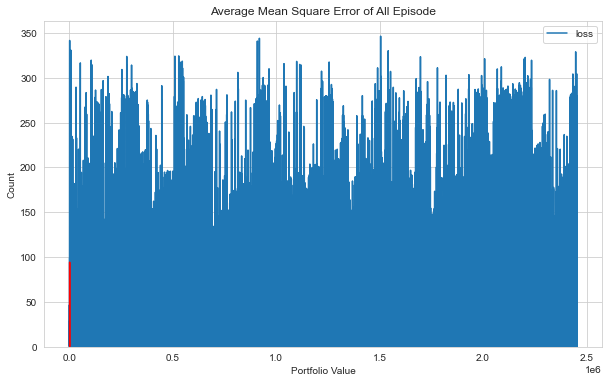

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

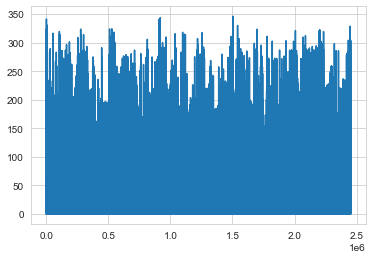

In [5]:
plt.plot(agent.model.losses)

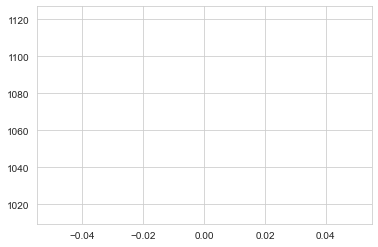

In [10]:
plt.plot(portfolio_value)

episode end value: 1068.19, duration: 0:00:00.072010
Sell: 183 times, Buy: 161 times


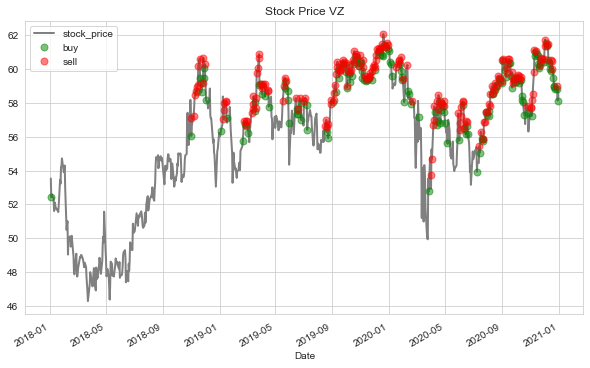

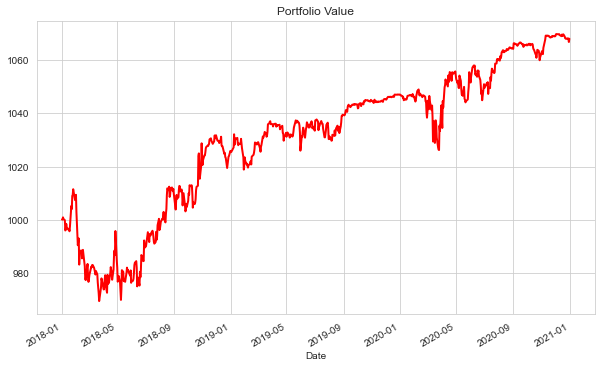

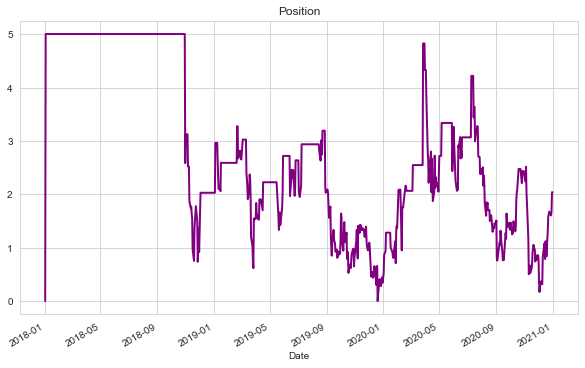

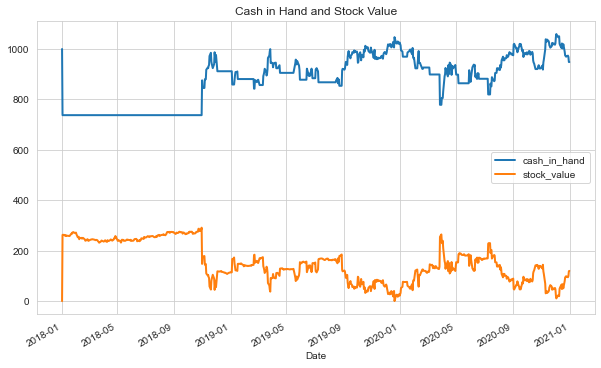

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [11]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: VZ
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 2.22 %
Volatility: 0.0361
shape ratio: 0.3113
Maximun drawdown: -4.17 %
Calmar ratio: 0.5331
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 3.15 %
Volatility (benchmark): 0.2072
shape ratio: 0.0989
Maximun drawdown: -19.54 %
Calmar ratio (benchmark): 0.1612


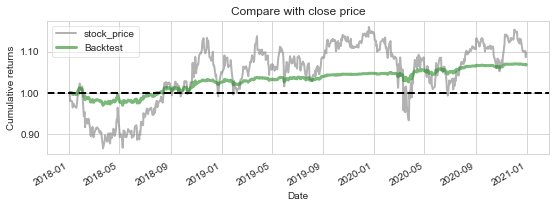

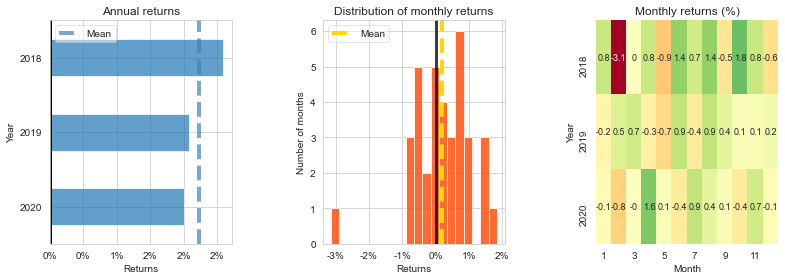

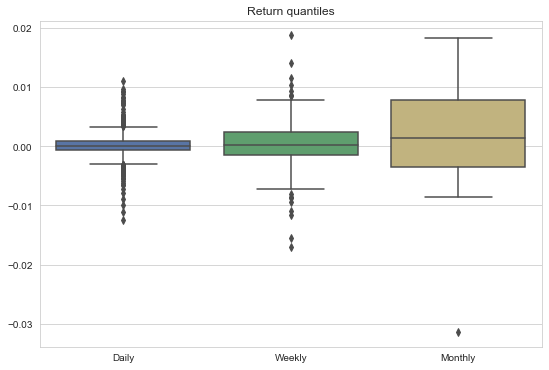

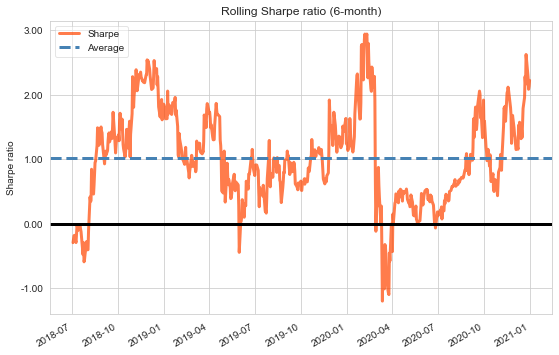

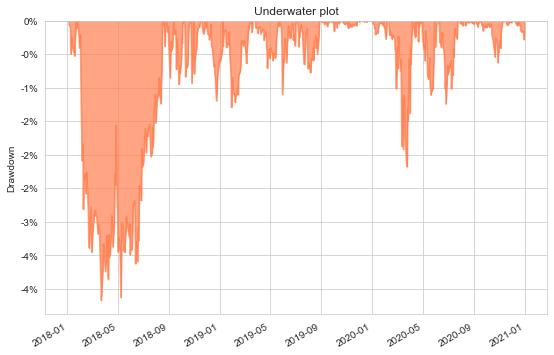

In [12]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')